# Unsupervised Learning on SMS Spam Collection Dataset

##### Assignment Requirements

1. **Understanding the Data** :
    - Provide a brief overview of the dataset.
    - Discuss what the data represents and the meaning of each feature.
2. **Text Pre-processing**:
    - Preprocess the text data by handling missing values, cleaning the text (e.g., removing special characters, stopwords), and normalizing it.
    - Ensure that the text is appropriately tokenized and transformed into a format suitable for unsupervised learning.
3. **Feature Extraction**:
    - Convert the text data into numerical features using techniques such as TF-IDF, word embeddings, or any other suitable method.
    - Justify clearly which sentence embedding technique is used in your approch.
4. **Clustering Algorithm Selection and Implementation**:
    - Choose an appropriate clustering algorithm (e.g., K-Means, DBSCAN, Hierarchical Clustering)
    - Justify the selection made for choosing the clustering algorithm.
5. **Cluster Evaluation and Interpretation**:
    - Evaluate the quality of the clusters using appropriate metrics such as Silhouette Score or Davies-Bouldin Index.
    - Visualize the clusters using dimensionality reduction techniques like PCA or t-SNE.
    - Interpret the results and provide insights into the patterns observed within the data.

#### 1. Understanding the data

- **Dataset Overview**

    **Size**: The dataset contains 5,572 instances (rows) and 2 features (columns).

    **Purpose**: The primary goal is to classify SMS messages as either spam or ham (not spam) based on their content.

- **Detailed information about each feature**

    1. `label`:
        - Description: The label indicating whether the SMS message is spam or ham.
        - Data Type: Categorical (string).
        - Categories:
            - spam: The message is classified as spam.
            - ham: The message is classified as not spam.

    2. `message`:
        - Description: The content of the SMS message.
        - Data Type: Text (string).

In [1]:
# importing libraries for data loading and pre-processing

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
#  dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### 2. Text Pre-Processsing

In [5]:
#  2.1 - Deleting all columns that are insignificant.

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [7]:
#  2.2 - renaming the columns for better readability and use

df.rename(columns={'v1': 'type', 'v2': 'text'}, inplace=True)
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#  2.3 - Encoding 'ham' to '0' and 'spam' to '1'

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['type'] = encoder.fit_transform(df['type'])

In [9]:
df.head(10)

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [10]:
# checking for any null value

df.isnull().sum()

,0
type,0
text,0


In [11]:
#  2.4 - checking for duplicates

df.duplicated().sum()

403

In [12]:
# since duplicates were found, we'll keep the first occurrence of each and remove the rest from the dataset.

df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
# checking how many spams and hams instances are there after cleaning (steps 2.1 to 2.4) the dataset

df['type'].value_counts()

,count
type,
0,4516
1,653


In [14]:
# 2.5 - Using NLTK to remove stop words and punctuation marks

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# calculating and storing number of characters in the text

df['num_char'] = df['text'].apply(len)
df.head(3)

,type,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [16]:
# calculating and storing number of words in the text

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(3)

,type,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [17]:
# calculating and storing number of sentences in the text

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.tail(3)

,type,text,num_char,num_words,num_sentences
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1
5571,0,Rofl. Its true to its name,26,7,2


In [18]:
#  Function to remove stop words and punctuation

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [19]:
# transforming and storing the transformed text in the dataset

df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,type,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


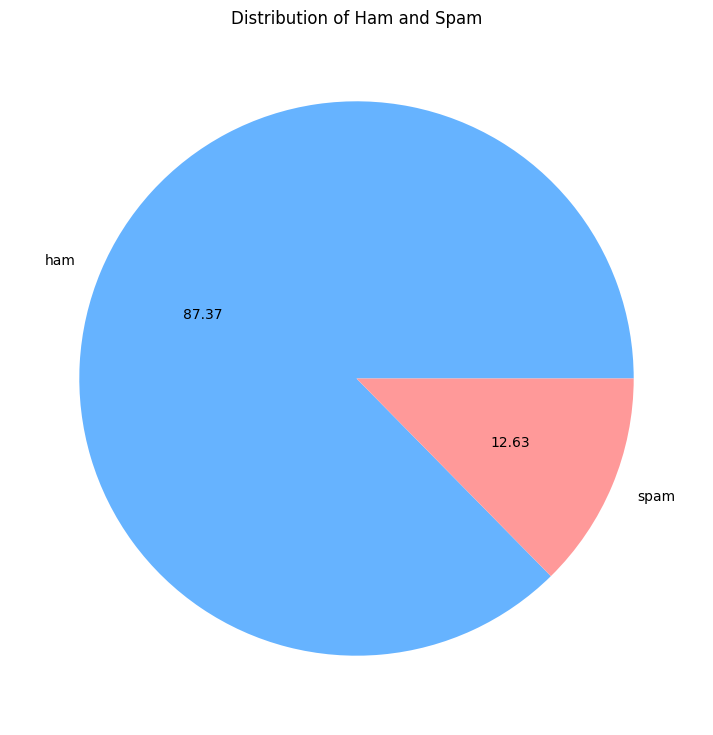

In [20]:
# Data Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.pie(df['type'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f', colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Ham and Spam')
plt.show()

#### 3. Feature Extraction

In [21]:
# Creating embeddings using TF-IDF

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [22]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [23]:
#  Saving the vectors for later use

import pickle as pkl
pkl.dump(tfidf,open('vectorizer.pkl','wb'))
print("File saved as vectorizer.pkl in the current directory")

File saved as vectorizer.pkl in the current directory


In [24]:
df

,type,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


**Justification for choosing TF-IDF embeddings**

TF-IDF emphasizes the most important words in a document by giving higher weight to terms that are unique or less frequent across the dataset. This helps in distinguishing documents (or messages) more effectively because common words (like "the", "and", etc.) are downweighted, allowing the model to focus on the more informative words that better capture the content's meaning. This makes TF-IDF particularly useful in text classification and clustering tasks, where understanding the key differences between documents is crucial.


- Data Visualization

In [25]:
#  dropping the columns with text to find correlation between type, num_char, num_words, and num_sentences

num_df = df.drop(columns=['text', 'transformed_text'])
num_df.head(3)

,type,num_char,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2


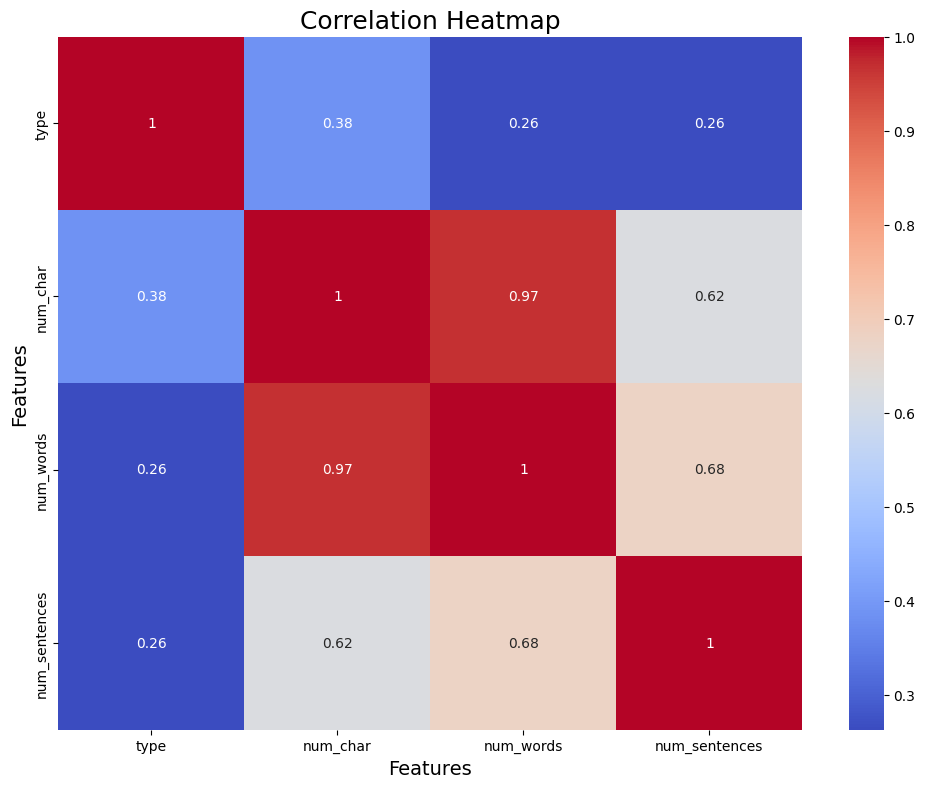

In [26]:
# Using Heatmap

import seaborn as sns

plt.figure(figsize=(12, 9))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.title('Correlation Heatmap', fontsize=18)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

In [27]:
from wordcloud import WordCloud

w_cloud = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = w_cloud.generate(df[df['type']==1]['transformed_text'].str.cat(sep=" "))

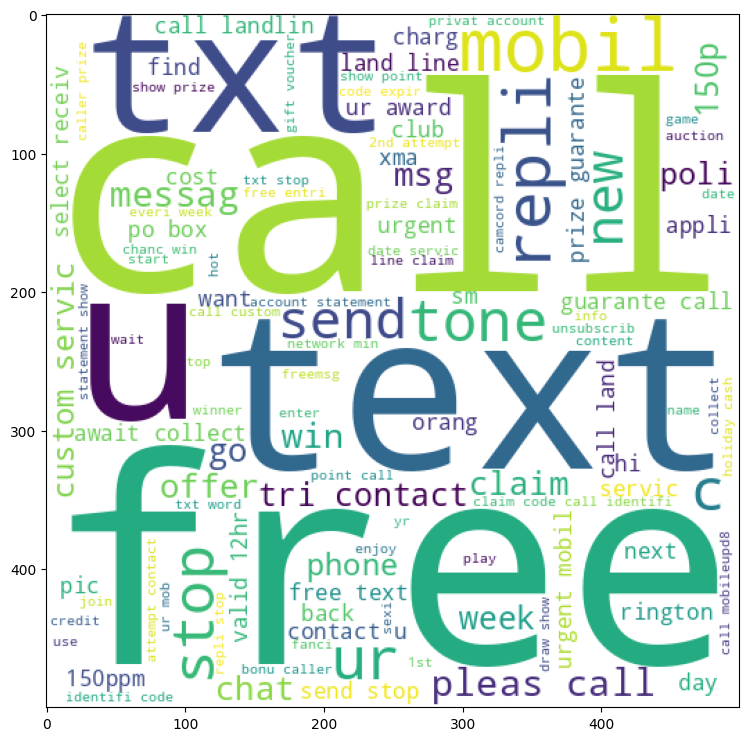

In [28]:
plt.figure(figsize=(12, 9))
plt.imshow(spam_wc)

**Observation**

The figure above shows the most common words in spam SMS messages. For example, 'call', 'free', 'txt', and 'text' appear frequently in the dataset.

#### 4. Clustering algorithm selection and implementation

Clustering algorithm selected: **KMeans**

In [29]:
from sklearn.cluster import KMeans
import numpy as np

num_clusters = 500
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fitting the model to TF-IDF encoded features
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Justification for selecting `Kmeans`**

The K-Means algorithm is particularly well-suited for SMS spam clustering due to its **efficiency in handling large datasets and its ability to quickly form distinct clusters**. When dealing with a large number of SMS messages, K-Means can effectively group similar messages together based on the frequency of terms, as represented by TF-IDF vectors. This makes it a practical choice over more complex algorithms. Additionally, K-Means provides clear centroids for each cluster, which helps in identifying key patterns or keywords that distinguish spam from non-spam, aiding in the interpretation and analysis of the results.

#### 5. Cluster Evaluation and Interpretation:
- Metric chosen to evaluate the quality of cluster: **Davies-Bouldin Score**

In [30]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.9984973065588025


- Visualizing the clusters using Principal Component Analysis (PCA)

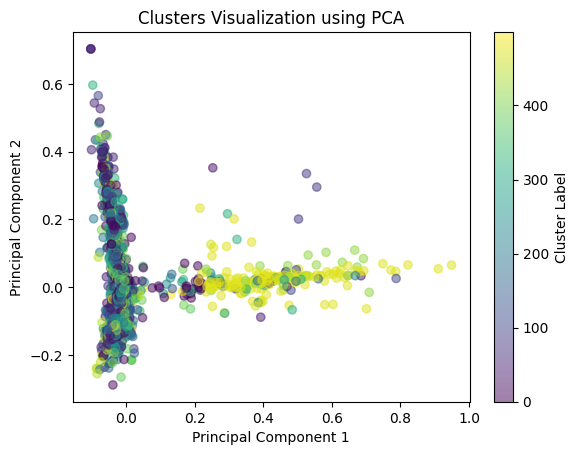

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducing dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


- **Pattern observed in the data**

The plot shows how PCA is used to visualise SMS messages and group them into several groups. Although each colour denotes a distinct cluster, several of the clusters overlap, suggesting that some messages share similarities despite being in distinct groupings. This implies that although the algorithm identified some trends in the messages, it may be difficult to distinguish between distinct message kinds (such as spam and non-spam) based only on clustering.

<<< End of document >>>